In [ ]:
#hide
from qbism import *

# Tutorial

> "Chauncey Wright, a nearly forgotten philosopher of real merit, taught me when young that I must not say necessary about the universe, that we don’t know whether anything is necessary or not. So I describe myself as a bettabilitarian. I believe that we can bet on the behavior of the universe in its contact with us." (Oliver Wendell Holmes, Jr.)

QBism, as I understand it, consists of two interlocking components, one part philosophical and one part mathematical. We'll deal with the mathematical part first.

## The Math

A Von Neumann measurement consists in a choice of observable represented by a Hermitian operator $H$. Such an operator will have real eigenvalues and orthogonal eigenvectors. For example, $H$ could be the energy operator. Then the eigenvectors would represent possible energy states, and the eigenvalues would represent possible values of the energy. According to textbook quantum mechanics, which state the system ends up in after a measurement will in general be random, and quantum mechanics allows you to calculate the probabilities. 

A Hermitian observable provides what is known as a "projection valued measure." Suppose our system were represented by a density matrix $\rho$. We could form the projectors $P_{i} = \mid v_{i} \rangle \langle v_{i} \mid$, where $\mid v_{i} \rangle$ is the $i^{th}$ eigenvector. Then the probability for the $i^{th}$ outcome would be given by $Pr(i) = tr(P_{i}\rho)$, and the state after measurement would be given by $\frac{P_{i} \rho P_{i}}{tr(P_{i}\rho)}$. Moreover, the expectation value of the observable $\langle H \rangle$ would be given by $tr(H\rho)$, and it amounts to a sum over the eigenvalues weighted by the corresponding probabilities.


In [ ]:
import numpy as np
import qutip as qt

d = 2
rho = qt.rand_dm(d)
H = qt.rand_herm(d)
L, V = H.eigenstates()
P = [v*v.dag() for v in V]
p = [(proj*rho).tr() for proj in P]

print("probabilities: %s" % p)
print("expectation value: %.3f" % (H*rho).tr())
print("expectation value again: %.3f" % (sum([L[i]*p[i] for i in range(d)])))

probabilities: [0.7863582631986583, 0.2136417368013418]
expectation value: 0.002
expectation value again: 0.002


<hr>

But there is a more general notion of measurement: a POVM (a positive operator valued measure). A POVM consists in a set of positive semidefinite operators that sum to the identity, i.e., a set $\{E_{i}\}$ such that $\sum_{i} E_{i} = I$. Positive semidefinite just means that the eigenvalues must be non-negative, so that $\langle \psi \mid E \mid \psi \rangle$ is always positive or zero for any $\mid \psi \rangle$. Indeed, keep in mind that density matrices are defined by Hermitian, positive semi-definite operators with trace $1$.

For a POVM, each *operator* corresponds to a possible outcome of the experiment, and whereas for a Von Neumann measurement, assuming no degeneracies, there would be $d$ possible outcomes, corresponding to the dimension of the Hilbert space, there can be *any* number of outcomes to a POVM measurement, as long as all the associated operators sum to the identity. The probability of an outcome, however, is similarly given by $Pr(i) = tr(E_{i}\rho)$. 

If we write each $E_{i}$ as a product of so-called Kraus operators $E_{i} = A_{i}^{\dagger}A_{i}$, then the state after measurement will be: $\frac{A_{i}\rho A_{i}^{\dagger}}{tr(E_{i}\rho)}$. The Kraus operators, however, aren't uniquely defined by the POVM, and so the state after measurement will depend on its implementation: to implement POVM's, you couple your system to an auxilliary system and make a standard measurement on the latter. We'll show how to do that in a little bit!

In the case we'll be considering, however, the $\{E_{i}\}$ will be rank-1, and so the state after measurement will be $\frac{\Pi_{i}\rho \Pi_{i}}{tr(\Pi_{i}\rho)}$ as before, where $\Pi_{i}$ are normalized projectors associated to each element of the POVM (details to follow).

(For a reference, recall that spin coherent states form an "overcomplete" basis, or frame, for spin states of a given $j$ value. This can be viewed as a POVM. In this case, the POVM would have an infinite number of elements, one for each point on the sphere: and the integral over the sphere gives $1$.)

<hr>

A very special kind of POVM is a so-called SIC-POVM: a symmetric informationally complete positive operator valued measure. They've been conjectured to exist in all dimensions, and numerical evidence suggests this is indeed the case. For a given Hilbert space of dimension $d$, a SIC is a set of $d^2$ rank-one projection operators $\Pi_{i} = \mid \psi_{i} \rangle \langle \psi_{i} \mid$ such that:

$$tr(\Pi_{k}\Pi_{l}) = \frac{d\delta_{k,l} + 1}{d+1} $$

Such a set of projectors will be linearly independent, and if you rescale they to $\frac{1}{d}\Pi_{i}$, they form a POVM: $\sum_{i} \frac{1}{d} \Pi_{i} = I$. 

The key point is that for any quantum state $\rho$, a SIC specifies a measurement *for which the probabilities of outcomes $p(i)$ specify $\rho$ itself*. Normally, say, in the case of a qubit, we'd have to measure the separate expectation values $(\langle X \rangle, \langle Y \rangle, \langle Z \rangle)$ to nail down the state: in other words, we'd have to repeat many times three *different* measurements. But for a SIC-POVM, the probabilities on each of the elements of the POVM fully determine the state: we're talking here about a *single* type of measurement.

<hr>

Thanks to Chris Fuchs & Co., we have a repository of SIC-POVM's in a variety of dimensions. One can download them [here](http://www.physics.umb.edu/Research/QBism/solutions.html). You'll get a zip of text files, one for each dimension: and in each text file will be a single complex vector: the "fiducial" vector. From this vector, the SIC can be derived. 

In order to do this, we first define (with Sylvester) the unitary clock and shift matrices for a given dimension $d$:

$$
X = \begin{pmatrix}
0      & 0      & 0      & \cdots & 0     & 1\\
1      & 0      & 0      & \cdots & 0     & 0\\
0      & 1      & 0      & \cdots & 0     & 0\\
0      & 0      & 1      & \cdots & 0     & 0\\
\vdots & \vdots & \vdots & \ddots &\vdots &\vdots\\
0      & 0      & 0      & \cdots & 1     & 0\\ 
\end{pmatrix}
$$

$$
Z = \begin{pmatrix}
1      & 0      & 0        & \cdots & 0\\
0      & \omega & 0        & \cdots & 0\\
0      & 0      & \omega^2 & \cdots & 0\\
\vdots & \vdots & \vdots   & \ddots & \vdots\\
0      & 0      & 0        & \cdots & \omega^{d-1}
\end{pmatrix}
$$

Where $\omega = e^{\frac{2\pi i}{d}}$.

Note that when $d=2$, this amounts to Pauli $X$ and $Z$.

In [ ]:
def shift(d):
    return sum([qt.basis(d, i+1)*qt.basis(d, i).dag()\
                    if i != d-1 else qt.basis(d, 0)*qt.basis(d, i).dag()\
                        for i in range(d) for j in range(d)])/d

def clock(d):
    w = np.exp(2*np.pi*1j/d)
    return qt.Qobj(np.diag([w**i for i in range(d)]))

We can then define displacement operators:

$$D_{a,b} = (-e^{\frac{i\pi}{d}})^{ab}X^{b}Z^{a} $$

For $a, b$ each from $0$ to $d$.

In [ ]:
def displace(d, a, b):
    Z, X = clock(d), shift(d)
    return (-np.exp(1j*np.pi/d))**(a*b)*X**b*Z**a

def displacement_operators(d):
    return dict([((a, b), displace(d, a, b)) for b in range(d) for a in range(d)])

Finally, if we act on the fiducial vector with each of the displacement operators, we obtain the $d^2$ pure states, whose projectors, weighted by $\frac{1}{d}$, form the SIC-POVM.

In [ ]:
def sic_states(d):
    fiducial = load_fiducial(d)
    return [D*fiducial for index, D in displacement_operators(d).items()]

Cf. `load_fiducial`.

By the way, this construction works because these SIC-POVM's are covariant under the Weyl-Heisenberg group. This means is that if you apply one of those displacement operators to all the SIC states, you get the same set of SIC states back! They just switch places among themselves. (It's also worth considering the action of elements of the "Clifford group", since these operators leave the Weyl-Heisenberg group invariant or, in other words, "normalize" it.)

In [ ]:
sic = sic_states(2)
D = displacement_operators(2)
print(sic)
print()
print([D[(1,1)]*state for state in sic])

[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.11931164+0.88002265j]
 [0.36578174+0.27843956j]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[ 0.11931164+0.88002265j]
 [-0.36578174-0.27843956j]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.36578174+0.27843956j]
 [0.11931164+0.88002265j]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.27843956+0.36578174j]
 [ 0.88002265-0.11931164j]]]

[Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.27843956+0.36578174j]
 [ 0.88002265-0.11931164j]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.27843956-0.36578174j]
 [0.88002265-0.11931164j]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.88002265+0.11931164j]
 [ 0.27843956-0.36578174j]], Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.11931164+0.8800

As far as anyone knows, the construction seems to work for SIC's in all dimensions. It's worth noting, however, the exceptional case of $d=8$, where there is *also another* SIC-POVM covariant under the tensor product of three copies of the Pauli group ($d=2$). Cf. `hoggar_fiducial`.

We can test that a given SIC has the property:

$$tr(\Pi_{k}\Pi_{l}) = \frac{d\delta_{k,l} + 1}{d+1} $$

In [ ]:
def test_sic_states(states):
    d = int(np.sqrt(len(states)))
    for i, s in enumerate(states):
        for j, t in enumerate(states):
            should_be = 1 if i == j else 1/(d+1)
            print("(%d, %d): %.4f | should be: %.4f" % (i, j, np.abs(s.overlap(t)**2), should_be))

states = sic_states(2)
test_sic_states(states)

(0, 0): 1.0000 | should be: 1.0000
(0, 1): 0.3333 | should be: 0.3333
(0, 2): 0.3333 | should be: 0.3333
(0, 3): 0.3333 | should be: 0.3333
(1, 0): 0.3333 | should be: 0.3333
(1, 1): 1.0000 | should be: 1.0000
(1, 2): 0.3333 | should be: 0.3333
(1, 3): 0.3333 | should be: 0.3333
(2, 0): 0.3333 | should be: 0.3333
(2, 1): 0.3333 | should be: 0.3333
(2, 2): 1.0000 | should be: 1.0000
(2, 3): 0.3333 | should be: 0.3333
(3, 0): 0.3333 | should be: 0.3333
(3, 1): 0.3333 | should be: 0.3333
(3, 2): 0.3333 | should be: 0.3333
(3, 3): 1.0000 | should be: 1.0000


In the case of a two dimensional Hilbert space, the SIC-POVM states will form a regular tetrahedron in the Bloch sphere:

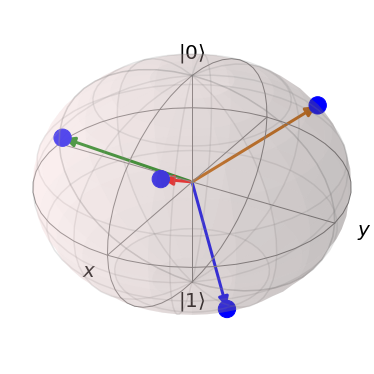

In [ ]:
pts = np.array([[qt.expect(qt.sigmax(), state),\
                 qt.expect(qt.sigmay(), state),\
                 qt.expect(qt.sigmaz(), state)] for state in states])

sphere = qt.Bloch()
sphere.point_size = [300]
sphere.add_points(pts.T)
sphere.add_vectors(pts)
sphere.make_sphere()

In general, in higher dimensions, the study of SIC's is a very interesting geometry problem involving the study of "maximal sets of complex equiangular lines," which has implications in various domains of mathematics.

In [ ]:
def sic_povm(d):
    return [(1/d)*state*state.dag() for state in sic_states(d)]

d = 2
ref_povm = sic_povm(d)
print("elements sum to identity? %s" % np.allclose(sum(ref_povm), qt.identity(d)))

elements sum to identity? True


Given a density matrix $\rho$, we can expand it in terms of the SIC-POVM elements via $tr(E_{i}\rho)$:

In [ ]:
def dm_probs(dm, ref_povm):
    return np.array([(e*dm).tr() for e in ref_povm]).real

rho = qt.rand_dm(d)
p = dm_probs(rho, ref_povm)
print("probabilities: %s" % p)
print("sum to 1? %s" % np.isclose(sum(p), 1))

probabilities: [0.1895833 0.1895833 0.3104167 0.3104167]
sum to 1? True


From these probabilities, we can uniquely reconstruct the density matrix via:

$$ \rho = \sum_{i} ((d+1)p(i) - \frac{1}{d})\Pi_{i} $$

Where $\Pi_{i}$ are the projectors onto the SIC states: $E_{i} = \frac{1}{d}\Pi_{i}$.

Or given the fact that $\sum_{i} \frac{1}{d} \Pi_{i} = I$:

$$\rho = (d+1) \sum_{i} p(i)\Pi_{i} - I $$


In [ ]:
def probs_dm_sic(p, ref_povm):
    d = int(np.sqrt(len(p)))
    return sum([((d+1)*p[i] - 1/d)*(e/e.tr()) for i, e in enumerate(ref_povm)])

def probs_dm_sic2(p, ref_povm):
    d = int(np.sqrt(len(p)))
    return (d+1)*sum([p[i]*e/e.tr() for i, e in enumerate(ref_povm)]) - qt.identity(d)

rho2 = probs_dm_sic(p, ref_povm)
rho3 = probs_dm_sic2(p, ref_povm)
print("recovered? %s" % (np.allclose(rho, rho2, rtol=1e-02, atol=1e-04) and np.allclose(rho, rho3, rtol=1e-02, atol=1e-04)))

recovered? True


<hr>

Now suppose we have the following situation. We first make a SIC-POVM measurement, and then we make a standard Von Neumann (PVM) measurement on a given system. Following the vivid imagery of Fuchs, we'll refer to the SIC-POVM as being "up in the sky" and the Von Neumann measurement as being "down on the ground".

So given our state $\rho$, above we've calculated the probabilities $p(i)$ for each outcome of the POVM. Now we'd like to assign probabilities for the outcomes of the Von Neumann measurement. What we need are the conditional probabilities $r(j|i)$, the probability of Von Neumann outcome $j$ given that the SIC-POVM returned $i$. Then:

$s(j) =  \sum_{i}^{d^2} p(i)r(j|i)$

This is just standard probability theory: the law of total probability. The probability for an outcome $j$ of the Von Neumann measurement is the sum over all the conditional probabilities for $j$, given some outcome $i$ of the SIC-POVM, multiplied by the probability that $i$ occured.

The standard way of thinking about this would be that after the SIC-POVM measurement:

$\rho^{\prime} = \sum_{i} p(i)\Pi_{i}$

In other words, after the first measurement, $\rho$ becomes a mixture of outcome states weighted by the probabilities of them occuring. In this simple case, where we aren't considering a subsystem of larger system, and we're sticking with SIC-POVM's whose elements, we recall, are rank-1, we can just use the projectors $\Pi_{i}$ for the SIC-POVM outcome states. Then the probabilities for the Von Neumann measurement are:

$s(j) = tr(\tilde{\Pi}_{j}\rho^{\prime})$

Where $\tilde{\Pi}_{j}$ is the projector for the $j^{th}$ Von Neumann outcome.

In [ ]:
von_neumann = qt.rand_herm(d)
vn_projectors = [v*v.dag() for v in von_neumann.eigenstates()[1]]

vn_rho = sum([prob*ref_povm[i]/ref_povm[i].tr() for i, prob in enumerate(p)])
vn_s = np.array([(proj*vn_rho).tr() for proj in vn_projectors]).real

print("vn probabilities after sic: %s" % vn_s)

vn probabilities after sic: [0.47071558 0.52928442]


Alternatively, however, we could form conditional probabilities directly:

$r(j|i) = tr(\tilde{\Pi}_{j}\Pi_{i})$

Where $\Pi_{i}$ is the projector for the $i^{th}$ POVM outcome (in the sky), and $\tilde{\Pi}_{j}$ is the projector for the $j^{th}$ Von Neumann outcome (on the ground).

Then we can use the formula:

$s(j) = \sum_{i}^{d^2} p(i)r(j|i)$


In [ ]:
def vn_conditional_probs(von_neumann, ref_povm):
    d = von_neumann.shape[0]
    vn_projectors = [v*v.dag() for v in von_neumann.eigenstates()[1]]
    return np.array([[(vn_projectors[j]*(e/e.tr())).tr() for i, e in enumerate(ref_povm)] for j in range(d)]).real

def vn_posterior(dm, von_neumann, ref_povm):
    d = dm.shape[0]
    p = dm_probs(rho, ref_povm)
    r = vn_conditional_probs(von_neumann, ref_povm)
    return np.array([sum([p[i]*r[j][i] for i in range(d**2)]) for j in range(d)])

print("vn probabilities after sic: %s" % vn_posterior(rho, von_neumann, ref_povm))

vn probabilities after sic: [0.47071558 0.52928442]


Indeed, $r(j|i)$ is a valid conditional probability matrix: its columns all sum to 1.

In [ ]:
np.sum(vn_conditional_probs(von_neumann, ref_povm), axis=0)

array([1., 1., 1., 1.])

Incidentally, there's no need to confine ourselves to the case of Von Neumann measurements. Suppose the "measurement on the ground" is given by another POVM. In fact, we can get one by just rotating our SIC-POVM by some random unitary. We'll obtain another SIC-POVM $\{F_{j}\}$.

In this case, we'd form $\rho^{\prime} = \sum_{i} p(i)\Pi_{i}$ just as before, and then take $s(j) = tr(F_{j}\rho^{\prime})$.

In [ ]:
U = qt.rand_unitary(d)
ground_povm = [U*e*U.dag() for e in ref_povm]

povm_rho = sum([prob*ref_povm[i]/ref_povm[i].tr() for i, prob in enumerate(p)])
povm_s = np.array([(e*povm_rho).tr() for e in ground_povm]).real

print("povm probabilities after sic: %s" % povm_s)

povm probabilities after sic: [0.2166969  0.25169366 0.26812392 0.26348553]


And alternatively, we could work with the conditional probabilities:

$r(j|i) = tr(F_{j}\Pi_{i})$

And then apply:

$s(j) = \sum_{i}^{d^2} p(i)r(j|i)$

Where now $j$ will range from $0$ to $d^2$.

In [ ]:
def povm_conditional_probs(povm, ref_povm):
    d = int(np.sqrt(len(ref_povm)))
    return np.array([[(a*(b/b.tr())).tr() for i, b in enumerate(ref_povm)] for j, a in enumerate(povm)]).real

def povm_posterior(dm, povm, ref_povm):
    d = dm.shape[0]
    p = dm_probs(dm, ref_povm)
    r = povm_conditional_probs(povm, ref_povm)
    return np.array([sum([p[i]*r[j][i] for i in range(d**2)]) for j in range(d**2)])

print("povm probabilities after sic: %s" % povm_posterior(rho, ground_povm, ref_povm))

povm probabilities after sic: [0.2166969  0.25169366 0.26812392 0.26348553]


<hr>

Okay, now we get to the punch line. Let's consider the case of the Von Neumann measurement. Suppose we *didn't* make the SIC-POVM measurement first. What would the probabilities be? Well, we all know:

$q(j) = tr(\tilde{\Pi}_{i}\rho)$

In [ ]:
vn_p = np.array([(proj*rho).tr() for proj in vn_projectors]).real
print("vn probabilities (no sic in the sky): %s" % vn_p)

vn probabilities (no sic in the sky): [0.41214673 0.58785327]


Now it turns out that we can get these same probabilities in a different way:

$q(j) = (d+1)[\sum_{i}^{d^2} p(i)r(j|i)] - 1$

In [ ]:
def vn_born(dm, von_neumann, ref_povm):
    d = dm.shape[0]
    p = dm_probs(dm, ref_povm)
    r = vn_conditional_probs(von_neumann, ref_povm)
    return np.array([(d+1)*sum([p[i]*r[j][i] for i in range(d**2)]) - 1 for j in range(d)]).real

print("vn probabilities (no sic in the sky): %s" % vn_born(rho, von_neumann, ref_povm))

vn probabilities (no sic in the sky): [0.41214673 0.58785327]


In other words, we can express the usual quantum probabilities in the case that we go directly to the Von Neumann measurement in a way that looks *ridiculously* close to our formula from before, involving probabilities for the SIC-POVM outcomes and conditional probabilities for Von Neumann outcomes given SIC-POVM outcomes! We sum over *hypothetical* outcomes of the SIC-POVM, multiplying the probability of each outcome, given our state $\rho$, by the conditional probability for the Von Neumann measurement giving the $j^{th}$ outcome, given that the SIC-POVM outcome was $i$. Except the formula is somewhat deformed by the the $(d+1)$ and the $-1$. 

Clearly, this is equivalent to the usual Born Rule: but it's expressed *entirely* in terms of probabilities and conditional probabilities. It makes sense, in the end, that you can do this, given that the probabilities for the SIC-POVM measurement completely nail down the state. The upshot is that we can just work with the probabilities instead! Indeed, we could just pick some SIC-POVM to be our "reference apparatus", and describe any quantum state we're ever interested in terms of probabilities with reference to it, and any measurement in terms of conditional probabilities. 

Operationally, what *is* difference between:

$s(j) = \sum_{i}^{d^2} p(i)r(j|i)$

and

$q(j) = (d+1)[\sum_{i}^{d^2} p(i)r(j|i)] - 1$

The difference is precisely *whether the SIC-POVM measurement has actually been performed*. If it has, then we lose quantum coherence. If it hasn't, we maintain it. In other words, the difference between classical and quantum is summed up in the minor difference between these two formulas.

In slogan form, due to Asher Peres, "unperformed measurements have no results." We'll get to the philosophy of this later, but the point is that classically speaking, we should be able to use the law of total probability *whether or not we actually do the measurement in the sky*: but quantum mechanically, if we don't actually do the measurement, we can't. But we have something just as good: the Born Rule.

<hr>

If we want to consider a more general measurement "on the ground," in particular, another SIC-POVM measurement, then our formula becomes:

$q(j) = (d+1)[\sum_{i}^{d^2} p(i)r(j|i)] - \frac{1}{d}[\sum_{i}^{d^2} r(j|i) ]$

Where now $i$ ranges to $d^2$.

In [ ]:
print("povm probabilities (no sic in the sky): %s" % dm_probs(rho, ground_povm))

povm probabilities (no sic in the sky): [0.15009069 0.25508097 0.30437175 0.2904566 ]


In [ ]:
def povm_born(dm, povm, ref_povm):
    d = dm.shape[0]
    p = dm_probs(dm, ref_povm)
    r = povm_conditional_probs(povm, ref_povm)
    return np.array([(d+1)*sum([p[i]*r[j][i] for i in range(d**2)]) - (1/d)*sum([r[j][i] for i in range(d**2)]) for j in range(d**2)]).real

print("povm probabilities (no sic in the sky): %s" % povm_born(rho, ground_povm, ref_povm))

povm probabilities (no sic in the sky): [0.15009069 0.25508097 0.30437175 0.2904566 ]


We can write these rules in much more compact matrix form.

Define $\Phi = (d+1)I_{d^2} - \frac{1}{d}J_{d^2}$

Where $I_{d^2}$ is the $d^2 \times d^2$ identity, and $J_{d^2}$ is the $d^2 \times d^2$ matrix all full of $1$'s.

If $R$ is the matrix of conditional probabilities, and $p$ is the vector of probabilities for the reference POVM in the sky, then the vector of values for $q(i)$ is:

$\vec{q} = R \Phi p$



In [ ]:
def vn_born_matrix(dm, von_neumann, ref_povm):
    d = rho.shape[0]
    p = dm_probs(dm, ref_povm)
    r = vn_conditional_probs(von_neumann, ref_povm)
    phi = (d+1)*np.eye(d**2) - (1/d)*np.ones((d**2,d**2))
    return r @ phi @ p

print("vn probabilities (no sic in the sky): %s" % vn_born_matrix(rho, von_neumann, ref_povm))

def povm_born_matrix(dm, povm, ref_povm):
    d = dm.shape[0]
    p = dm_probs(dm, ref_povm)
    r = povm_conditional_probs(povm, ref_povm)
    phi = (d+1)*np.eye(d**2) - (1/d)*np.ones((d**2,d**2))
    return r @ phi @ p
print("povm probabilities (no sic in the sky): %s" % povm_born_matrix(rho, ground_povm, ref_povm))

vn probabilities (no sic in the sky): [0.41214673 0.58785327]
povm probabilities (no sic in the sky): [0.15009069 0.25508097 0.30437175 0.2904566 ]


And for that matter, we can calculate the "classical" probabilities from before in the same vectorized way: we just leave out $\Phi$!

In [ ]:
print("vn probabilities after sic: %s" % (vn_conditional_probs(von_neumann, ref_povm) @ dm_probs(rho, ref_povm)))
print("povm probabilities after sic: %s" % (povm_conditional_probs(ground_povm, ref_povm) @ dm_probs(rho, ref_povm)))

vn probabilities after sic: [0.47071558 0.52928442]
povm probabilities after sic: [0.2166969  0.25169366 0.26812392 0.26348553]


In fact, this this is how qbist operators are implemented in this library behind the scenes. It allows one to easily handle the general case of IC-POVM's (informationally complete POVM's) which aren't SIC's: in that case, the matrix $\Phi$ will be different. Cf. `povm_phi`.

<hr>

Let's consider time evolution in this picture. We evolve our $\rho$ by some unitary:

$\rho_{t} = U \rho U^{\dagger}$

Naturally, we can calculate the new probabilities with reference to our SIC-POVM:

In [ ]:
U = qt.rand_unitary(d)
rhot = U*rho*U.dag()
pt = dm_probs(rhot, ref_povm)

print("time evolved probabilities: %s" % pt)

time evolved probabilities: [0.1895833 0.1895833 0.3104167 0.3104167]


But we could also express this in terms of conditional probabilities:

$u(j|i) = \frac{1}{d}tr(\Pi_{j}U\Pi_{i}U^{\dagger})$

As:

$p_{t}(j) = \sum_{i}^{d^2} ((d+1)p(i) - \frac{1}{d})u(j|i)$


In [ ]:
def temporal_conditional_probs(U, ref_povm):
    d = U.shape[0]
    return np.array([[(1/d)*((a/a.tr())*U*(b/b.tr())*U.dag()).tr() for i, b in enumerate(ref_povm)] for j, a in enumerate(ref_povm)]).real

u = temporal_conditional_probs(U, ref_povm)
pt2 = np.array([sum([((d+1)*p[i] - 1/d)*u[j][i] for i in range(d**2)]) for j in range(d**2)]).real
print("time evolved probabilities: %s" % pt2)

time evolved probabilities: [0.1895833 0.1895833 0.3104167 0.3104167]


We can compare this to the standard rule for stochastic evolution:

$p_{t}(j) = \sum_{i} p(i)u(j|i)$

We can see how the expression is deformed in exactly the same way. Indeed $u(j|i)$ is a doubly stochastic matrix: its rows and colums all sum to 1. And we can describe the time evolution of the quantum system in terms of it.

In [ ]:
print(np.sum(u, axis=0))
print(np.sum(u, axis=1))

[1. 1. 1. 1.]
[1. 1. 1. 1.]


For more on the subleties of time evolution, consider the notes on `conditional_probs`.

<hr>

You can express the inner product between states in terms of SIC-POVM probability vectors via:

$tr(\rho \sigma) = d(d+1)[\vec{p} \cdot \vec{s}] - 1$

In [ ]:
d = 3
ref_povm = sic_povm(d)

rho = qt.rand_dm(d)
sigma = qt.rand_dm(d)

p = dm_probs(rho, ref_povm)
s = dm_probs(sigma, ref_povm)

def quantum_inner_product_sic(p, s):
    d = int(np.sqrt(len(p)))
    return d*(d+1)*np.dot(p, s) - 1

print("inner product of rho and sigma: %.3f" % (rho*sigma).tr().real)
print("inner product of rho and sigma: %.3f" % quantum_inner_product_sic(p, s))

inner product of rho and sigma: 0.333
inner product of rho and sigma: 0.333


This brings up an important point.

You might wonder: Suppose we have a SIC-POVM with $d^2$ elements which provides $d^2$ probabilities which completely nail down the quantum state, given as a $d \times d$ density matrix. But what if we just start off with any old random vector of $d^2$ probabilities? Will we always get a valid density matrix? In other words, we've seen how we can start with quantum states, and then proceed to do quantum mechanics entirely in terms of probabilities and conditional probabilities. But now we're considering going in reverse. Does *any* assignment of probabilities to SIC-POVM outcomes specify a valid quantum state?

Well: any probability assignment will give us a $\rho$ which is Hermitian and has trace 1, which is great--BUT: this $\rho$ may not be positive-semidefinite (which is a requirement for density matrices). Like: if you assigned any old probabilites to the SIC-POVM outcomes, and then constructed a correponding $\rho$, it might end up having negative eigenvalues. Since the eigenvalues of $\rho$ are supposed to be probabilities (positive, summing to 1, etc), this is a problem.

In fact, you can't even have probability vectors that are too sharply peaked at any one value!


In [ ]:
d = 3
povm = sic_povm(d)

vec = np.zeros(d**2)
vec[np.random.randint(d**2)] = 1

print("probs: %s" % vec)
print(probs_dm(vec, povm))

probs: [0. 0. 0. 0. 0. 0. 1. 0. 0.]
Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 0.09996448+0.j          0.58704937+0.00894882j  0.85113669-1.45631434j]
 [ 0.58704937-0.00894882j -0.68689371+0.j          0.44220778-0.78382399j]
 [ 0.85113669+1.45631434j  0.44220778+0.78382399j  1.58692923+0.j        ]]


Note the negative entries. Furthermore, even if we start off in a SIC-POVM state, that doesn't mean we'll get that state with certainty after the measurement--indeed, unlike with projective measurements, repeated measurements don't always give the same results. 

In [ ]:
d = 3
povm = sic_povm(d)
print(dm_probs(povm[0]/povm[0].tr(), povm))

[0.33333333 0.08332833 0.08332833 0.08332833 0.08332833 0.08334835
 0.08332833 0.08334835 0.08332833]


Above we see the probabilities for SIC-POVM outcomes given that we start off in the first SIC-POVM state. We see that indeed, the first SIC-POVM state has the highest probability, but all the other elements have non-zero probability (and for SIC's this is the same probability: not true for general IC-POVM's).

Indeed, it's a theorem that no such probability vector can have an element which exceeds $\frac{1}{d}$, and that the number of $0$ entries is bounded above by $\frac{d(d-1)}{2}$.



So we need another constraint. In other words, the quantum state space is a *proper subset* of the probability simplex over $d^2$ outcomes. There's some very interesting work exploring the geometric aspects of this constraint. 

For example, insofar as pure states are those Hermitian matrices satisfying $tr(\rho^2) = tr(\rho^3) = 1$, we can evidently finagle this into two conditions:

$\sum_{i}^{d^2} p(i)^2 = \frac{2}{d(d+1)}$

and

$\sum_{i,j,k} c_{i, j, k}p(i)p(j)p(k) = \frac{d+7}{(d+1)^3}$

Where $c_{i, j, k} = \Re{[tr(\Pi_{i}\Pi_{j}\Pi_{k})]}$, which is a real-valued, completely symmetric three index tensor. The quantum state space is the <a href="https://en.wikipedia.org/wiki/Convex_hull">convex hull</a> of probability distributions satisfying these two equations. 

On this same note, considering our expression for the inner product, since we know that the inner product between two quantum states $\rho$ and $\sigma$ is bounded between $0$ and $1$, we must have:

$\frac{1}{d(d+1)} \leq \vec{p} \cdot \vec{s} \leq \frac{2}{d(d+1)}$

The upper bound corresponds to our first condition. Call two vectors $\vec{p}$ and $\vec{s}$ "consistent" if their inner product obeys both inequalities. If we have a subset of the probability simplex for which every pair of vectors satisfies the inequalities, call it a "germ." If adding one more vector to a germ makes the set inconsistent, call the germ "maximal." And finally, call a maximal germ a "qplex." The space of quantum states in the SIC representation form a qplex, but not all qplexes correspond to quantum state spaces. The geometry of the qplexes are explored in <a href="https://arxiv.org/abs/1612.03234">Introducing the Qplex: A Novel Arena for Quantum Theory</a>. The conclusion?

"\[Turning\] to the problem of identifying the “missing assumption” which will serve to pick out quantum state space uniquely from the set of all qplexes... Of course, as is usual in such cases, there is more than one possibility. We identify one such assumption: the requirement that the symmetry group contain a subgroup isomorphic to the projective unitary group. This is a useful result because it means that we have a complete characterization of quantum state space in probabilistic terms. It also has an important corollary: That SIC existence in dimension d is equivalent to the existence of a certain kind of subgroup of the real orthogonal group in dimension $d^2 − 1$."

<hr>

Here's one final thing, for flavor. Having specified a SIC-POVM with $n$ elements and then an additional measurement (Von Neumann or POVM), we can construct the matrix $r(j|i)$.

In [ ]:
d = 2
ref_povm = sic_povm(d)
von_neumann = qt.rand_herm(d)

n = len(ref_povm)
r = vn_conditional_probs(von_neumann, ref_povm)
r

array([[0.21132487, 0.21132487, 0.78867513, 0.78867513],
       [0.78867513, 0.78867513, 0.21132487, 0.21132487]])

We can then consider its rows, and extract a set of vectors $s_{j}$, each of which sums to 1:

$r(j|i) = n\gamma_{j} s_{j}(i)$

In [ ]:
s = np.array([row/sum(row) for row in r])
gammas = [sum(row)/n for row in r]

In [ ]:
np.array([n*gammas[i]*row for i, row in enumerate(s)])

array([[0.21132487, 0.21132487, 0.78867513, 0.78867513],
       [0.78867513, 0.78867513, 0.21132487, 0.21132487]])

We'll call these vectors $s_{j}$ "measurement vectors."

Suppose we're completely indifferent to the outcomes of the POVM in the sky. We could represent this by: $p(i) = \frac{1}{n}$. In other words, equal probability for each outcome.

The probabilities for outcomes to the later Von Neumann measurement would be:

$q(j) = \frac{1}{n}\sum_{i}r(j|i)$

In [ ]:
p = [1/n for i in range(n)]
vn_probs = np.array([sum([p[i]*r[j][i] for i in range(n)]) for j in range(d)])
vn_probs

array([0.5, 0.5])

We could describe this by assigning to $\rho$ the maximally mixed state.

In [ ]:
max_mixed = qt.identity(d)/d
vn_born(max_mixed, von_neumann, ref_povm)

array([0.5, 0.5])

But we could also rewrite $q(j)$ as:

$q(j) = \frac{1}{n} \sum_{i} n\gamma_{j} s_{j}(i) = \gamma_{j} \sum_{i} s_{j}(i)$

And since the $s_{j}(i)$ sum to 1:

$q(j) = \gamma_{j}$

In [ ]:
np.array([gammas[j]*sum([s[j][i] for i in range(n)]) for j in range(d)])

array([0.5, 0.5])

In [ ]:
gammas

[0.4999999999999999, 0.49999999999999994]

Thus you can interpret the $\gamma_{j}$'s as: the probabilities of obtaining the $j^{th}$ outcome on the ground when you're completely indifferent to the potential outcomes in the sky.

Now let's rewrite:

$r(j|i) = n\gamma_{j} s_{j}(i)$

as

$s_{j}(i) = \frac{\frac{1}{n}r(j|i)}{\gamma_{j}}$

We know that $\gamma_{j}$ is the probability of obtaining $j$ on the ground, given complete ignorance about the potential outcomes of the sky experiment. We also know that $\frac{1}{n}$ is the probability assigned to each outcome of the sky experiment from complete indifference. 

So write $Pr_{CI}(i)= \frac{1}{n}$ and $Pr_{CI}(j) = \gamma_{i}$, where $CI$ stands for complete ignorance/indifference. And we could apply the same notation: $Pr_{CI}(j|i) = r(j|i)$:

$s_{j}(i) = \frac{Pr_{CI}(i)Pr_{CI}(j|i)}{Pr_{CI}(j)}$

But this is just the Baysian formula for inverting conditional probabilities:

$Pr_{CI}(i|j) = \frac{Pr_{CI}(i)Pr_{CI}(j|i)}{Pr_{CI}(j)}$

In a similar vein:

<img src="img/fuchs.png">


<hr>

## Interlude: Implementing POVM's



It's worth mentioning how POVM's are actually implemented in practice. Here's the simplest way of thinking about it. Suppose we have a system with Hilbert space dimension $d$, and we have a POVM with $n$ elements. (In the case of our SIC-POVM's, we'd have $d^2$ elements.) We then adjoin an auxilliary system with Hilbert space dimension $n$: as many dimensions as POVM elements. So now we're working with $\mathcal{H}_{d} \otimes \mathcal{H}_{n}$.

Let's define projectors onto the basis states of the auxilliary system: $\Xi_{i} = I_{d} \otimes \mid i \rangle \langle i \mid$. If we denote the elements of the POVM by $\{ E_{i} \}$, then we can construct an isometry:

$V = \sum_{i}^{n} \sqrt{E_{i}} \otimes \mid i \rangle$

Such that any element of the POVM can be written:

$E_{i} = V^{\dagger}\Xi_{i}V $


In [ ]:
d = 3
my_povm = sic_povm(d)
n = len(my_povm)

aux_projectors = [qt.tensor(qt.identity(d), qt.basis(n, i)*qt.basis(n, i).dag()) for i in range(n)]
V = sum([qt.tensor(my_povm[i].sqrtm(), qt.basis(n, i)) for i in range(n)])

povm_elements = [V.dag()*aux_projectors[i]*V for i in range(n)]
print("recovered povm elements? %s" % np.all([np.allclose(my_povm[i], povm_elements[i]) for i in range(n)]))

recovered povm elements? True


So this isometry $V$ takes us from $\mathcal{H}_{d}$ to $\mathcal{H}_{d} \otimes \mathcal{H}_{n}$.
We can extend this to a unitary $U$ (that takes $\mathcal{H}_{d} \otimes \mathcal{H}_{n}$ to $\mathcal{H}_{d} \otimes \mathcal{H}_{n}$) using the QR decomposition. In essence, we use the Gram-Schmidt procedure to fill out the rectangular matrix to a square matrix with extra orthogonal columns. (And then we have to rearrange the columns so that the columns of $V$ appear every $n^{th}$ column, in order to take into account the tensor product structure.)

In [ ]:
Q, R = np.linalg.qr(V, mode="complete")

for i in range(d):
    Q[:,i*n] = V[:,i].T

U = qt.Qobj(Q)
U.dims = [[d, n],[d, n]]

We can check our work. It should be the case that:

$V = U(I_{d} \otimes \mid 0 \rangle)$

In [ ]:
print("recovered V?: %s" % np.allclose(V, U*qt.tensor(qt.identity(d), qt.basis(n, 0))))

recovered V?: True


Now for the finale. We know how to calculate the probabilities for each of the POVM outcomes. It's just:

$Pr(i) = tr(E_{i}\rho)$

To actually implement this, we start off with our auxilliary system in the $\mid 0 \rangle$ state, so that the overall density matrix is: $\rho \otimes \mid 0 \rangle \langle 0 \mid$. We then evolve the system and the auxilliary with our unitary $U$: 

$$U [\rho \otimes \mid 0 \rangle \langle 0 \mid] U^{\dagger} $$

Finally, we perform a standard Von Neumann measurement on the auxilliary system (whose outcomes correspond to the basis states we've been using). Recalling that we defined the projectors onto the auxilliary basis states as $\Xi_{i} = I_{d} \otimes \mid i \rangle \langle i \mid$, we can  then write probabilities for each outcome:

$Pr(i) = tr(\Xi_{i} U [\rho \otimes \mid 0 \rangle \langle 0 \mid] U^{\dagger} )$

These are the same probabilities as above.

In [ ]:
rho = qt.rand_dm(d)
povm_probs = np.array([(my_povm[i]*rho).tr() for i in range(n)]).real

system_aux_probs = np.array([(aux_projectors[i]*\
                        U*qt.tensor(rho, qt.basis(n,0)*qt.basis(n,0).dag())*U.dag()).tr()\
                            for i in range(n)]).real

print("povm probs:\n%s" % povm_probs)
print("system and aux probs:\n%s" % system_aux_probs)

povm probs:
[0.14347539 0.12795568 0.12275462 0.12076828 0.0548661  0.06606244
 0.11953627 0.08713102 0.15745018]
system and aux probs:
[0.14347539 0.12795568 0.12275462 0.12076828 0.0548661  0.06606244
 0.11953627 0.08713102 0.15745018]


Moreover, we can see that the states after measurement correspond to the SIC-POVM projectors:

In [ ]:
states = [(aux_projectors[i]*(U*qt.tensor(rho, qt.basis(n,0)*qt.basis(n,0).dag())*U.dag())).ptrace(0) for i in range(n)]
print(states[0].unit())
print(d*my_povm[0])

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.64671347+0.j         0.21279188+0.36409112j 0.11056486+0.19597917j]
 [0.21279188-0.36409112j 0.27499462+0.j         0.14671348+0.00223761j]
 [0.11056486-0.19597917j 0.14671348-0.00223761j 0.0782919 +0.j        ]]
Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.64671348+0.j         0.21279188+0.36409113j 0.11056486+0.19597917j]
 [0.21279188-0.36409113j 0.27499463+0.j         0.14671348+0.00223761j]
 [0.11056486-0.19597917j 0.14671348-0.00223761j 0.0782919 +0.j        ]]


Indeed, whether you buy the philosophy that we're about to go into, SIC-POVM's have deep practical value in terms of quantum tomography and quantum information theory generally.

Cf. `implement_povm`.

<hr>

## The Philosophy

So in some sense the difference between classical and quantum is summed up in the difference between these two formulas:

$s(j) = \sum_{i}^{d^2} p(i)r(j|i)$

and

$q(j) = (d+1)[\sum_{i}^{d^2} p(i)r(j|i)] - 1$

In the first case, I make a SIC-POVM measurement in the sky, and then make a Von Neumann measurement on the ground. I can calculate the probabilities for the outcomes of the latter measurement using the law of total probability. Given the probabilities for the sky outcomes, and the conditional probabilities that relate ground outcomes to sky outcomes, I can calculate the probabilities for ground outcomes. Classically speaking, and this is the crucial point, I could use the first formula *whether or not I actually did the sky measurement*. 

In other words, insofar as classically we've identified the relevant "degrees of freedom," and the assignment of sky probabilities uniquely characterizes the state, then it's a matter of mathematical convenience if we express $s(j)$ as a sum over those degrees of freedom $\sum_{i}^{d^2} p(i)r(j|i)$: by the nature of the formula, by the law of total probability, all the $i$'s drop out, and we're left with the value for $j$. We could actually perform the sky measurement or not: either way, we'd use the same formula to calculate the ground probabilities.

This is precisely what changes with quantum mechanics: it makes a difference *whether you actually do the sky measurement or not*. If you do, then you use the classical formula. If you don't, then you use the quantum formula. 

One way of interpreting the moral of this is that, to quote Asher Peres again, "Unperformed measurements have no results." In contrast, classically, you *can* always regard unperformed measurements as having results: indeed, classical objectivity consists in, as it were, everything wearing its outcomes on its sleeve. In other words, outcomes aren't a special category: one can just speak of the properties of things. And this is just another way of saying you can use the law of total probability whether or not you actually do an intermediate measurement. But this is exactly what you can't rely on in quantum mechanics. 

But remarkably, all you need to do to update your probability calculus is to use the quantum formula, which is ultimately the Born Rule in disguise. In other words, in a world where unperformed measurements have no results, when we consider different kinds of sequences of measurements, we need a (minor) addition to probability theory so that our probability assignments are coherent/consistent/no one can make a buck off of us.

Moreover, Blake Stacey makes the nice point, considering the realtionship between SIC-POVM's and Von Neumann measurements:

"Two orthogonal quantum states are perfectly distinguishable with respect to some experiment, yet in terms of the reference \[SIC-POVM\] measurement, they are inevitably overlapping probability distributions. The idea that any two valid probability distributions for the reference measurement must overlap, and that the minimal overlap in fact corresponds to distinguishability with respect to some other test, expresses the fact that quantum probability is not about hidden variables" (Stacey 2020).

<hr>

de Finetti famously advocated a subjectivist, personalist view of classical probability theory, and he and his theorems have proved to be an inspiration for QBists like Christopher Fuchs and others. In this view, probabilities don't "exist" out in the world: they are mathematical representations of personal beliefs which you are free to update in the face of new evidence. There isn't ever "one objective probability distribution" for things: rather, there's a constant personal process of convergence towards better beliefs. If you don't want to make bad bets, there are some basic consistency criteria that your probabilities have to satisfy. And that's what probability theory as such amounts to. The rest is just "priors." 

"Statisticians for years had been speaking of how statistical sampling can reveal the 'unknown probability distribution'. But from de Finetti’s point of view, this makes as little sense as the unknown quantum state made for us. What de Finetti’s representation theorem established was that all this talk of an unknown probability was just that, talk. Instead, one could show that there was a way of thinking of the resultant of statistical sampling purely in terms of a transition from prior subjective probabilities (for the sampler himself) to posterior subjective probabilities (for the sampler himself). That is, every bit of statistical sampling from beginning to end wasn’t about revealing a true state of affairs (the “unknown probability”), but about the statistician’s own states of information about a set of “exchangeable” trials, full stop. The quantum de Finetti theorem does the same sort of thing, but for quantum states" (Fuchs 2018).

Indeed, QBists advocate a similar epistemic interpretation of the quantum state. The quantum state does not represent a quantum system. It represents *your beliefs about that quantum system*. In other words, interpretations that assign ontological roles to quantum states miss the mark. Quantum states are just packages of probabilities, indeed, probabilities personal to you. (In this sense, one can see a close relation to relational interpretations of quantum mechanics, where the quantum state is always defined not objectively, but to one system relative to another system.) Similarly, all the superstructure of quantum mechanics, operators, time evolution, etc-- are all just a matter of making subjective probabilities consistent with each other, given the *objective fact* that you should use the quantum formula when you haven't done an intermediate measurement, and the classical formula if you have. (And one should also mention that the formulas above imply that the *dimension* of the Hilbert space is, in fact, objective.)

On the other hand, QBists also hold that the very outcomes of measurements themselves are subjective--not in the sense of being vacuously open to intepretation, but in the sense that they are *experiences*; and it is precisely these subjective experiences that are being gambled upon. In other words, quantum mechanics is not a theory of the objective physical world as such, but is instead a first person theory by which one may predict the future consequences of one's own actions in experience. 

This is how they deal with the dilemma of Wigner's friend. Fuchs: "...for the QBist, the real world, the one both agents are embedded in—with its objects and events—is taken for granted. What is not taken for granted is each agent's access to the parts of it he has not touched. Wigner holds two thoughts in his head: a) that his friend interacted with a quantum system, eliciting some consequences of the interaction for himself, and b) after the specified time, for any of Wigner's own future interactions with his friend or the system or both, he ought to gamble upon their consequences according to $U(\rho \otimes \mid \psi \rangle \langle \psi \mid) U^{\dagger}$. One statement refers to the friend's potential experiences, and one refers to Wigner's own. So long as it is explicit that $U(\rho \otimes \mid \psi \rangle \langle \psi \mid) U^{\dagger}$ refers to the latter--i.e., how Wigner should gamble upon the things that might happen to him--making no statement whatsoever about the former, there is no conflict. The world is filled with all the same things it was before quantum theory came along, like each of our experiences, that rock and that tree, and all the other things under the sun; it is just that quantum theory provides a calculus for gambling on each agent's experiences--it doesn't give anything other than that. It certainly doesn't give one agent the ability to conceptually pierce the other agent's personal experience. It is true that with enough effort Wigner \[could apply the reverse unitary, disentangling the friend and the spin\], causing him to predict that his friend will have amnesia to any future questions on his old measurement results. But we always knew Wigner could do that--a mallet to the head would have been good enough" (Fuchs, Stacey 2019).

Most assuredly, this is not a solipsistic theory: indeed, the actual results of measurement are precisely not within one's control. The way they imagine it is that whenever you set up an experiment, you divide the world into subject and object: the subject has the autonomy to set up the experiment, and the object has the autonomy to respond to the experiment. But the act of measurement itself is a kind of creation, a mutual experience which transcends the very distinction between subject and object itself, a linkage between oneself and the other. "QBism says that when an agent reaches out and touches a quantum system—when he performs a quantum measurement—this process gives rise to birth in a nearly literal sense" (Fuchs, Stacey 2019).

The only conflict here is with a notion that the only valid physical theories are those that attempt to directly represent the universe "in its totality as a pre-existing static system; an unchanging, monistic something that just *is*." Moreover, a theory like QBism clears a space for "real particularity and 'interiority' in the world." For Wigner, considering his friend and the system, with his back turned, "that phenomenon has an inside, a vitality that he takes no part in until he again interacts with one or both relevant pieces of it."

Often in the interpretation of quantum mechanics, one tries to achieve objectivity by focusing on the big bulky apparatuses we use and the "objective" record of outcomes left behind by these machines. The QBists take a different track: Bohr himself considers the analogy of a blind man seeing with a stick. He's not actively, rationally thinking about the stick and how it's skittering off this or that: rather, for him, it becomes an extension of his body: he *sees with the stick*. And thus one can understand Fuchs's three tenants of QBism:

1. Quantum Theory Is Normative, Not Descriptive
2. My Probabilities Cannot Tell Nature What To Do
3. A Measuring Device Is Literally an Extension of the Agent

<hr>

<img width=600 src="img/qbism_assumptions1.png">

<img width=600 src="img/qbism_assumptions2.png">

<hr>

Indeed, one might wonder about entanglement in this picture. In line with the discussion of Wigner's friend, we can interpret entanglement and the use of tensor product itself as relating to the objective fact that we require a way of representing correlations while being completely agnostic about what is correlated insofar as we haven't yet reached out and "touched" the thing.

Moreover, in this sense, one can look at QBism as a completely "local" theory. An experimenter has one half of an entangled pair of spins, and makes a measurement, and has an experience. In the textbook way of thinking it, this causes the state of the other spin to immedietely collapse. QBism takes a different approach. They say: quantum theory allows the experimenter to predict that if they go over and measure the other spin in the same direction, they will have another experience, of the answers of the two particles being correlated. But just because quantum theory licenses the experimenter to assign a probability 1 for the latter outcome after they do the first measurement doesn't mean that the latter particle *really is now $\uparrow$, say, as a property*. If the experimenter never actually goes to check out the other particle, it's yet another unperformed measurement: and it has no outcome yet. To paraphrase William James, if it isn't experienced, it isn't real. And in order to "cash out" on entanglement, one actually has to traverse the distance between the two particles and compare the results.

With regard to quantum teleportation, in this view, it's not about getting "things" from one place to another, but about making one's information cease referring to this part of the universe and start referring instead to another part of the universe, without referring to anything  else in between. "The only nontrivial thing transferred in the process of teleportation is *reference*" (Fuchs, Stacey 2019).

<hr>

One of the things that makes QBism so interesting is its attempt to give nature as much latitude as possible. Usually in science, we're mentally trying to constraint nature, applying concepts, laws, systems, to it, etc. QBism instead proposes that we live in a unfinished world, whose creation is ongoing and ceaseless, and that this profound openendedness is the real meaning behind "quantum indeterminism." In itself, the universe is not governed by immutable laws and initial conditions fixed from the beginning: instead, new situations are coming into being all the time. Of course, regularities arise by evolution, the laws of large numbers, symmetries and so forth. But they take seriously John Wheeler's idea of the "participatory universe," that we and everything else are constantly engaged bringing the universe into being, together. 

Wheeler writes:

"How did the universe come into being? Is that some strange, far-off process beyond hope of analysis? Or is the mechanism that comes into play one which all the time shows itself? Of all the signs that testify to 'quantum phenomenon' as being the elementary act and building block of existence, none is more striking than its utter absence of internal structure and its untouchability. For a process of creation that can and does operate anywhere, that is more basic than particles or fields or spacetime geometry themselves, a process that reveals and yet hides itself, what could one have dreamed up out of pure imagination more magic and more fitting than this?"


"'Law without law': It is difficult to see what else than that can be the “plan” for physics. It is preposterous to think of the laws of physics as installed by a Swiss watchmaker to endure from everlasting to everlasting when we know that the universe began with a big bang. The laws must have come into being. Therefore they could not have been always a hundred percent accurate. That means that they are derivative, not primary. Also derivative, also not primary is the statistical law of distribution of the molecules of a dilute gas between two intersecting portions of a total volume. This law is always violated and yet always upheld. The individual molecules laugh at it; yet as they laugh they find themselves obeying it. ... Are the laws of physics of a similar statistical character? And if so, statistics of what? Of billions and billions of acts of observer-participancy which individually defy all law? . . . \[Might\] the entirety of existence, rather than \[be\] built on particles or fields or multidimensional geometry, \[be\] built on billions upon billions of elementary quantum phenomena, those elementary acts of observer-participancy?"


<img src="img/wheeler.png">


<hr>

In such world, to quote William James, "Theories thus become instruments, not answers to enigmas, in which we can rest. We don’t lie back upon them, we move forward, and, on occasion, make nature over again by their aid." Moreover, in relegating quantum states to the observers who use them for predictions, one clears some ontological space for the quantum systems themselves to be "made of" who knows what qualitative, experiential stuff.

"\[QBism\] means that reality differs from one agent to another. This is not as strange as it may sound. What is real for an agent rests entirely on what that agent experiences, and different agents have different experiences. An agent-dependent reality is constrained by the fact that different agents can communicate their experience to each other, limited only by the extent that personal experience can be expressed in ordinary language. Bob’s verbal representation of his own experience can enter Alice’s, and vice-versa. In this way a common body of reality can be constructed, limited only by the inability of language to represent the full flavor — the “qualia” — of personal experience" (Fuchs, Mermin, Schack 2013).

Indeed, the QBists reach back in time and draw on the work of the old American pragmatists: James, John Dewey, Charles Sanders Peirce, and others. It's interesting to read their works particularly as many of them date from the pre-quantum era, so that even in the very face of classical physics, they were advocating a radically indeterministic, experience-first view of the world. 

For example, James writes:

"Chance] is a purely negative and relative term, giving us no information about that of which it is predicated, except that it happens to be disconnected with something else—not controlled, secured, or necessitated by other things in advance of its own actual presence... What I say is that it tells us nothing about what a thing may be in itself to call it “chance.” ... All you mean by calling it “chance” is that this is not guaranteed, that it may also fall out otherwise. For the system of other things has no positive hold on the chance-thing. Its origin is in a certain fashion negative: it escapes, and says, Hands off! coming, when it comes, as a free gift, or not at all."

"This negativeness, however, and this opacity of the chance-thing when thus considered ab extra, or from the point of view of previous things or distant things, do not preclude its having any amount of positiveness and luminosity from within, and at its own place and moment. All that its chance-character asserts about it is that there is something in it really of its own, something that is not the unconditional property of the whole. If the whole wants this property, the whole must wait till it can get it, if it be a matter of chance. That the universe may actually be a sort of joint-stock society of this sort, in which the sharers have both limited liabilities and limited powers, is of course a simple and conceivable notion."

<hr>

"Why may not the world be a sort of republican banquet of this sort, where all the qualities of being respect one another’s personal sacredness, yet sit at the common table of space and time?
To me this view seems deeply probable. Things cohere, but the act of cohesion itself implies but few conditions, and leaves the rest of their qualifications indeterminate. As the first three notes of a tune comport many endings, all melodious, but the tune is not named till a particular ending has actually come,—so the parts actually known of the universe may comport many ideally possible complements. But as the facts are not the complements, so the knowledge of the one is not the knowledge of the other in anything but the few necessary elements of which all must partake in order to be together at all. Why, if one act of knowledge could from one point take in the total perspective, with all mere possibilities abolished, should there ever have been anything more than that act? Why duplicate it by the tedious unrolling, inch by inch, of the foredone reality? No answer seems possible. On the other hand, if we stipulate only a partial community of partially independent powers, we see perfectly why no one part controls the whole view, but each detail must come and be actually given, before, in any special sense, it can be said to be determined at all. This is the moral view, the view that gives to other powers the same freedom it would have itself."

<hr>

"Does our act then create the world’s salvation so far as it makes room for itself, so far as it leaps into the gap? Does it create, not the whole world’s salvation of course, but just so much of this as itself covers of the world’s extent? Here I take the bull by the horns, and in spite of the whole crew of rationalists and monists, of whatever brand they be, I ask why not? Our acts, our turning-places, where we seem to ourselves to make ourselves and grow, are the parts of the world to which we are closest, the parts of which our knowledge is the most intimate and complete. Why should we not take them at their facevalue? Why may they not be the actual turning-places and growing-places which they seem to be, of the world—why not the workshop of being, where we catch fact in the making, so that nowhere may the world grow in any other kind of way than this?"

"Irrational! we are told. How can new being come in local spots and patches which add themselves or stay away at random, independently of the rest? There must be a reason for our acts, and where in the last resort can any reason be looked for save in the material pressure or the logical compulsion of the total nature of the world? There can be but one real agent of growth, or seeming growth, anywhere, and that agent is the integral world itself. It may grow all-over, if growth there be, but that single parts should grow per se is irrational."

"But if one talks of rationality—and of reasons for things, and insists that they can’t just come in spots, what kind of a reason can there ultimately be why anything should come at all?"

<hr>

"What does determinism profess? It professes that those parts of the universe already laid down absolutely appoint and decree what the other parts shall be. The future has no ambiguous possibilities hidden in its womb; the part we call the present is compatible with only one totality. Any other future complement than the one fixed from eternity is impossible. The whole is in each and every part, and welds it with the rest into an absolute unity, an iron block, in which there can be no equivocation or shadow of turning."

"Indeterminism, on the contrary, says that the parts have a certain amount of loose play on one another, so that the laying down of one of them does not necessarily determine what the others shall be. It admits that possibilities may be in excess of actualities, and that things not yet revealed to our knowledge may really in themselves be ambiguous. Of two alternative futures which we conceive, both may now be really possible; and the one become impossible only at the very moment when the other excludes it by becoming real itself. Indeterminism thus denies the world to be one unbending unit of fact. It says there is a certain ultimate pluralism in it."

<hr>

"The import of the difference between pragmatism and rationalism is now in sight throughout its whole extent. The essential contrast is that for rationalism reality is ready-made and complete from all eternity, while for pragmatism it is still in the making, and awaits part of its complexion from the future. On the one side the universe is absolutely secure, on the other it is still pursuing its adventures..."

"The humanist view of 'reality,' as something resisting, yet malleable, which controls our thinking as an energy that must be taken 'account' of incessantly is evidently a difficult one to introduce to novices...
The alternative between pragmatism and rationalism, in the shape in which we now have it before us, is no longer a question in the theory of knowledge, it concerns the structure of the universe itself."

"On the pragmatist side we have only one edition of the universe, unfinished, growing in all sorts of places, especially in the places where thinking beings are at work. On the rationalist side we have a universe in many editions, one real one, the infinite folio, or ́edition de luxe, eternally complete; and then the various finite editions, full of false readings, distorted and mutilated each in its own way."

<hr>

And yet, we know that quantum mechanics presents many faces, Bohmian deterministic faces, the many faces of Many Worlds, and so forth. It's beautiful, in a way: there's something for everybody. One is reminded of another passage from James:

"The history of philosophy is to a great extent that of a certain clash of human temperaments. Undignified as such a treatment may seem to some of my colleagues, I shall have to take account of this clash and explain a good many of the divergencies of philosophies by it. Of whatever temperament a professional philosopher is, he tries, when philosophizing, to sink the fact of his temperament. Temperament is no conventionally recognized reason, so he urges impersonal reasons only for his conclusions. Yet his temperament really gives him a stronger bias than any of his more strictly objective premises. It loads the evidence for him one way or the other ... just as this fact or that principle would. He trusts his temperament. Wanting a universe that suits it, he believes in any representation of the universe that does suit it."

"Why does Clifford fearlessly proclaim his belief in the conscious-automaton theory, although the ‘proofs’ before him are the same which make Mr. Lewes reject it? Why does he believe in primordial units of ‘mind-stuff’ on evidence which would seem quite worthless to Professor Bain? Simply because, like every human being of the slightest mental originality, he is peculiarly sensitive to evidence that bears in some one direction. It is utterly hopeless to try to exorcise such sensitiveness by calling it the disturbing subjective factor, and branding it as the root of all evil. ‘Subjective’ be it called! and ‘disturbing’ to those whom it foils! But if it helps those who, as Cicero says, “vim naturae magis sentiunt” \[feel the force of nature more\], it is good and not evil. Pretend what we may, the whole man within us is at work when we form our philosophical opinions. Intellect, will, taste, and passion co-operate just as they do in practical affairs...\[I\]n the forum \[one\] can make no claim, on the bare ground of his temperament, to superior discernment or authority. There arises thus a certain insincerity in our philosophic discussions: the potentest of all our premises is never mentioned. I am sure it would contribute to clearness if in these lectures we should break this rule and mention it, and I accordingly feel free to do so."

Indeed, for James, the value of a philosophy lies not so much in its proofs, but in the total vision that it expresses. As I say, perhaps the universe itself has something for everyone, whatever their temperament.

<hr>

As a final word, it seems to me that QBism has taught us something genuinely new about quantum theory and its relationship to probability theory. On the other hand, it also pretends to be a theory of "experience": and yet, I'm not sure that I've learned anything new about experience. If QBism is to really prove itself, it will have to make novel predictions not just on the quantum side, but also on the side of our everyday perceptions. 

"The burning question for the QBist is how to model in Hilbert-space terms the common sorts of measurements we perform just by opening our eyes, cupping our ears, and extending our fingers" (Fuchs, Stacey 2019).

## Bibliography



<a href="https://arxiv.org/abs/1612.07308">QBism: Quantum Theory as a Hero’s Handbook</a>

<a href="https://arxiv.org/abs/1612.03234">Introducing the Qplex: A Novel Arena for Quantum Theory</a>

<a href="https://arxiv.org/abs/1311.5253">An Introduction to QBism with an Application to the Locality of Quantum Mechanics</a>

<a href="https://arxiv.org/abs/1003.5209">QBism, the Perimeter of Quantum Bayesianism</a>

<a href="https://arxiv.org/abs/1301.3274">Quantum-Bayesian Coherence: The No-Nonsense Version</a>

<a href="https://arxiv.org/abs/1401.7254">Some Negative Remarks on Operational Approaches to Quantum Theory</a>

<a href="https://arxiv.org/abs/1405.2390">My Struggles with the Block Universe</a>

<a href="https://arxiv.org/abs/1412.4209">Quantum Measurement and the Paulian Idea</a>

<a href="https://arxiv.org/abs/quant-ph/0105039">Notes on a Paulian Idea</a>

<a href="https://arxiv.org/abs/1601.04360">On Participatory Realism</a>

<a href="https://arxiv.org/abs/0906.1968">Delirium Quantum</a>

<a href="https://arxiv.org/abs/1703.07901">The SIC Question: History and State of Play</a>

<a href="https://arxiv.org/abs/1705.03483">Notwithstanding Bohr, the Reasons for QBism</a>

<a href="https://arxiv.org/abs/2012.14397">The Born Rule as Dutch-Book Coherence (and only a little more)</a>

<a href="https://arxiv.org/abs/quant-ph/0205039">Quantum Mechanics as Quantum Information (and only a little more)</a>

<a href="https://arxiv.org/abs/1907.02432">Quantum Theory as Symmetry Broken by Vitality</a>

https://en.wikipedia.org/wiki/POVM

https://en.wikipedia.org/wiki/SIC-POVM

<a href="refs/wheeler_law_without_law.pdf">Law without Law</a>

<a href="http://www.gutenberg.org/ebooks/11984">A Pluralistic Universe</a>

<a href="http://www.gutenberg.org/ebooks/32547">Essays in Radical Empiricism</a>